# CS156 Assignment 4 
# MNIST Digits
### Yuhao Chen

## Part1. Import Libraries And Datasets
#### Import all necessary librabries

In [2]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from array import array as pyarray
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from prettytable import PrettyTable

#### Import all necessary datasets

In [3]:
# Import MNIST data(Retrieved from https://gist.github.com/MFathirIrhas/f24d61d134b014da029a)
def load_mnist(dataset="training", digits=np.arange(10), path=".", size = 60000):
    if dataset == "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')

    else:
        raise ValueError("dataset must be 'testing' or 'training'")
    
    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()
    
    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()
    
    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = size #int(len(ind) * size/100.)
    images = np.zeros((N, rows, cols), dtype='uint8')
    labels = np.zeros((N, 1), dtype='int8')
    
    for i in range(N): #int(len(ind) * size/100.)):
        images[i] = np.array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]
    labels = [label[0] for label in labels]
    return images, labels

## Part2. Data Processing
#### Separate Training and Testing Sets

In [4]:
# Load data with function defined above
train = load_mnist(dataset="training")
test = load_mnist(dataset="testing")

# Load the training set data and labels
X_train = train[0]
y_train = np.asarray(train[1])

# Load the testing set data and labels
X_test = test[0]
y_test = np.asarray(test[1])

#### Select samples for number 1 and 3

In [5]:
# Find index for images with labels 1 and 3
idx_2_train = np.where(y_train == 1)
idx_3_train = np.where(y_train == 3)

# Locates the images in training set
idx_train = []
for a in idx_2_train+idx_3_train:
    for b in a:
        idx_train.append(b)

# Redefine training data and labels with the indexs of 1 and 3
X_train = X_train[idx_train]
y_train = y_train[idx_train]


# Locates the images in testing set
idx_2_test = np.where(y_test == 1)
idx_3_test = np.where(y_test == 3)

idx_test = []
for a in idx_2_test+idx_3_test:
    for b in a:
        idx_test.append(b)

X_test = X_test[idx_test]
y_test = y_test[idx_test]

#### Print Samples for 1s and 3s

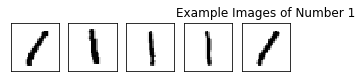

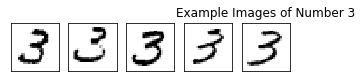

In [6]:
# Find and print the first 5 images with label 1
p1 = plt.figure(figsize=(5, 2))
for i in range(5):
    ax = p1.add_subplot(2, 5, i + 1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap = 'gray_r')
    
plt.title('Example Images of Number 1')
plt.show()

# Find and print the last 5 images with label 3
p2 = plt.figure(figsize=(5, 2))
for i in range(5):
    ax = p2.add_subplot(2, 5, i + 1, xticks = [], yticks = [])
    ax.imshow(X_train[-(i+1)], cmap = 'gray_r')

plt.title('Example Images of Number 3')
plt.show()

#### Reshape the sets into 2 dimensional arrays

In [7]:
# Observe the shape of training and testing sets
print(X_train.shape)
print(X_test.shape)

# Reshape them in a shape needed for training
X_train = np.reshape(X_train, (12873, 28*28))
X_test = np.reshape(X_test, (2145, 28*28))

(12873, 28, 28)
(2145, 28, 28)


## Part3. Support Vector Classifier Training
#### Train a linear support vector classifier

In [8]:
# Train a SVC with linear kernel

# Set the model
linear_SVC = SVC(kernel="linear")
# Record start time
start_time = time.time()
# Fit the model
linear_SVC.fit(X_train, y_train)
# Record end time
end_time = time.time()

# Print total time of training
print("The Linear SVC takes %s seconds" % (end_time - start_time))

# Predict the y with the trained model and calculate the accuracy score
y_pred = linear_SVC.predict(X_test)
print("Accuracy for the Linear SVC is", accuracy_score(y_test, y_pred))

The Linear SVC takes 5.506447792053223 seconds
Accuracy for the Linear SVC is 0.9916083916083916


#### Train a poly support vector classifier

In [35]:
# Train a SVC with poly kernel
linear_SVC = SVC(kernel="poly")
start_time = time.time()
linear_SVC.fit(X_train, y_train)
end_time = time.time()
print("The Linear SVC takes %s seconds" % (end_time - start_time))

y_pred = linear_SVC.predict(X_test)
print("Accuracy for the Linear SVC is", accuracy_score(y_test, y_pred))

The Linear SVC takes 3.7725729942321777 seconds
Accuracy for the Linear SVC is 0.9976689976689976


#### Train a RBF support vector classifier

In [10]:
# Train a SVC with RBF kernel
linear_SVC = SVC(kernel="rbf", gamma="scale")
start_time = time.time()
linear_SVC.fit(X_train, y_train)
end_time = time.time()
print("The Linear SVC takes %s seconds" % (end_time - start_time))

y_pred = linear_SVC.predict(X_test)
print("Accuracy for the Linear SVC is", accuracy_score(y_test, y_pred))

TypeError: must be real number, not str

#### Show a confusion matrix for RBF SVC

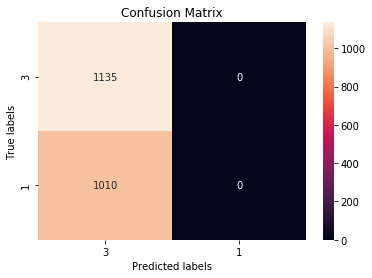

In [40]:
# Create a confusion matrix to show why RBF behave so bad (Retrieved from https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python)
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels([3, 1])
ax.yaxis.set_ticklabels([3, 1])
plt.show()

From the confusion matrix, we can find that the SVC model with RBF kernel recognize all images to be 3. To be honest, I'm not sure why RBF behave so bad in this classification probelm. One speculation is that we need to adjust hyper parameters like gamma and C to better use the RBF kernel.

## Part4. Conclusion

In [39]:
x = PrettyTable(["SVC Kernel Type", "Training Time", "Error Rate"])
x.add_row(["Linear",'5.29s','0.84%'])
x.add_row(["Poly",'3.77s','0.23%'])
x.add_row(["RBF",'348.94s','47.09%'])
print(x)

+-----------------+---------------+------------+
| SVC Kernel Type | Training Time | Error Rate |
+-----------------+---------------+------------+
|      Linear     |     5.29s     |   0.84%    |
|       Poly      |     3.77s     |   0.23%    |
|       RBF       |    348.94s    |   47.09%   |
+-----------------+---------------+------------+


From the table, we can see that while using SVC model to classify the hand-writting numbers 1 and 3, the poly kernel is the best, which behaves the best in both training time and accuracy. However, RBF kernel behaves the worst, which is the worst in the both indices. 